### Import libs from packages

In [1]:
import pandas as pd
from med.room.processors.class_principal import CallMethods
from med.room.processors.data_views import DataVisualizer
from med.room.processors.transform_data import NedRoomClean
from med.room.utils import logger

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Creating DataFrame

In [3]:
dados = {'indices_id': ['0','1','2','3'],
         'Frase original': ['Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?'],
         'Frases comparativas': ['De acordo com a escala de dor ali na parede', 
                                'qual valor você acha que mais representa a sua dor?',
                                'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
                                'Qual a intensidade da sua dor?'],
         }

In [4]:
dataset = pd.DataFrame(dados)

In [5]:
dataset

,indices_id,Frase original,Frases comparativas
0,0,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",De acordo com a escala de dor ali na parede
1,1,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",qual valor você acha que mais representa a sua dor?
2,2,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?","De 0 a 10, qual o nível de intensidade da sua dor atualmente?"
3,3,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",Qual a intensidade da sua dor?


In [6]:
dataset.shape

(4, 3)

### Save DataSet in Lake

In [7]:
filename = 'dados_frases'
df = NedRoomClean.save_file(dataset, filename)

[03/13 10:12:36] - [Info]:  save csf file
[03/13 10:12:36] - [Info]:  Finishing Process


### Declare Variables

In [8]:
filename = 'dados_frases'
column_text = ['Frase original', 'Frases comparativas']
additional_stop_words = ['bom', 'dia', 'ola', 'eu']
especifc_word_similar = 'dor'
title_of_plot_first = 'Similar words from text'
list_of_relationship_positive = ["acordo", "melhor"]
list_of_relationship_negative = ['dor', 'intensidade']

#target_sentence = "You'd love to drink a cool refreshing Coke"
target_sentence = ["Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",
                  "De acordo com a escala de dor ali na parede",
                  'qual valor você acha que mais representa a sua dor?',
                                'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
                                'Qual a intensidade da sua dor?']

### Building Process

In [9]:
dataset, model_similar, matrix_words, dataframe_matrix, model, embeddings_en_2d, print_info, similar, word_clusters, w2v_vocab_result, result = CallMethods.call_processors(filename=filename,
                                                                                column_text=column_text,
                                                                                additional_stop_words=additional_stop_words,
                                                                                especifc_word_similar=especifc_word_similar,
                                                                                list_of_relationship_positive=list_of_relationship_positive,
                                                                                list_of_relationship_negative=list_of_relationship_negative,
                                                                                target_sentence=target_sentence)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd592cfed30>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[03/13 10:12:41] - [Info]:  Start Process to Similary Words
[03/13 10:12:41] - [Info]:  Load DataFrame
[03/13 10:12:41] - [Info]:  load csf file
[03/13 10:12:41] - [Info]:  Finishing Process
[03/13 10:12:41] - [Debug]:  Numbers of columns and Rows (4, 3)
[03/13 10:12:41] - [Debug]:  Columns Name Index(['indices_id', 'Frase original', 'Frases comparativas'], dtype='object')
[03/13 10:12:41] - [Info]:  Start Process to Transform Data
[03/13 10:12:41] - [Debug]:  column created: 
 0    olhando escala parede valor indicaria melhor dor hoje
1    olhando escala parede valor indicaria melhor dor hoje
2    olhando escala parede valor indicaria melhor dor hoje
3    olhando escala parede valor indicaria melhor dor hoje
Name: Frase original_clean, dtype: object
[03/13 10:12:41] - [Debug]:  column created: 
 0        acordo escala dor ali parede
1      valor voce acha representa dor
2    nivel intensidade dor atualmente
3                     intensidade dor
Name: Frases comparativas_clean, dtype: 

### Visualize Results

In [10]:
# dataframe construido
dataset

,indices_id,Frase original,Frases comparativas,Frase original_clean,Frases comparativas_clean,Frase original_token,Frases comparativas_token,concatenado
0,0,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",De acordo com a escala de dor ali na parede,olhando escala parede valor indicaria melhor dor hoje,acordo escala dor ali parede,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[acordo, escala, dor, ali, parede]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, acordo, escala, dor, ali, parede]"
1,1,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",qual valor você acha que mais representa a sua dor?,olhando escala parede valor indicaria melhor dor hoje,valor voce acha representa dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[valor, voce, acha, representa, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, valor, voce, acha, representa, dor]"
2,2,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?","De 0 a 10, qual o nível de intensidade da sua dor atualmente?",olhando escala parede valor indicaria melhor dor hoje,nivel intensidade dor atualmente,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[nivel, intensidade, dor, atualmente]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, nivel, intensidade, dor, atualmente]"
3,3,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",Qual a intensidade da sua dor?,olhando escala parede valor indicaria melhor dor hoje,intensidade dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[intensidade, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, intensidade, dor]"


In [11]:
# lista de palavras de todo dataset
matrix_words

['olhando',
 'escala',
 'parede',
 'valor',
 'indicaria',
 'melhor',
 'dor',
 'hoje',
 'acordo',
 'ali',
 'voce',
 'acha',
 'representa',
 'nivel',
 'intensidade',
 'atualmente']

In [12]:
# matrix de score entre todas as palavras cruzadas do dataset
dataframe_matrix

,olhando,escala,parede,valor,indicaria,melhor,dor,hoje,acordo,ali,voce,acha,representa,nivel,intensidade,atualmente
olhando,1.000000,-0.163537,0.067680,0.032810,-0.054538,0.019358,0.088620,0.152516,-0.153764,0.040072,-0.046981,-0.148253,0.040712,0.055317,-0.017531,-0.042253
escala,-0.163537,1.000000,0.122506,0.026627,-0.030849,0.005213,-0.056726,-0.106514,0.062306,0.011594,-0.120143,0.216012,-0.177427,-0.007339,-0.183153,-0.055000
parede,0.067680,0.122506,1.000000,0.063781,-0.155142,-0.259917,0.007955,0.021168,-0.096087,0.059885,0.050184,-0.022001,-0.030159,0.235513,-0.026179,-0.063638
valor,0.032810,0.026627,0.063781,1.000000,0.079353,-0.059961,-0.029537,0.130052,0.166389,-0.114680,-0.038968,0.044020,0.033306,0.100532,-0.007715,-0.006449
indicaria,-0.054538,-0.030849,-0.155142,0.079353,1.000000,0.071101,-0.025225,-0.025572,-0.084998,-0.063984,0.041062,-0.046655,0.133651,0.092597,-0.156237,0.239785
melhor,0.019358,0.005213,-0.259917,-0.059961,0.071101,1.000000,-0.044907,0.010393,-0.130909,0.032236,0.004511,-0.043543,-0.168079,-0.135980,-0.126773,0.109675
dor,0.088620,-0.056726,0.007955,-0.029537,-0.025225,-0.044907,1.000000,0.084885,-0.079046,0.035555,0.029873,-0.254740,0.209783,0.212276,0.087118,-0.051343
hoje,0.152516,-0.106514,0.021168,0.130052,-0.025572,0.010393,0.084885,1.000000,-0.082947,-0.090664,0.059266,-0.100445,0.076373,-0.084627,-0.072478,-0.168444
acordo,-0.153764,0.062306,-0.096087,0.166389,-0.084998,-0.130909,-0.079046,-0.082947,1.000000,0.154931,0.041687,0.057329,-0.110134,-0.196790,-0.027043,0.041375
ali,0.040072,0.011594,0.059885,-0.114680,-0.063984,0.032236,0.035555,-0.090664,0.154931,1.000000,-0.066214,-0.083259,-0.071242,0.156588,-0.117609,-0.003442


In [13]:
# modelo word2Vec treinado
model

In [14]:
# matrix construida a partir da lista de palavras matrix_words que é todo o contexto do dataset
embeddings_en_2d

array([[[-1210.9719   ,  -493.62204  ],
        [ -689.4607   , -1107.7719   ],
        [ -469.9657   , -2402.981    ],
        [-1491.7496   ,  2429.6853   ],
        [ -213.13878  ,   276.24152  ],
        [ 1272.4763   ,  2064.4458   ],
        [  615.5053   ,  -815.94714  ],
        [  945.18097  ,    69.66312  ],
        [-1456.0834   , -1287.5819   ],
        [ -341.7778   ,  2350.229    ],
        [ -702.81134  ,   781.0488   ],
        [  467.05176  ,   832.2197   ],
        [ 2252.8062   ,  -774.70404  ],
        [ 2283.0374   ,   906.24475  ],
        [ 1092.967    , -2180.4226   ]],

       [[ 2252.8062   ,  -774.70404  ],
        [ -469.9657   , -2402.981    ],
        [ 2283.0374   ,   906.24475  ],
        [  946.1874   ,  -982.2333   ],
        [ 1272.4763   ,  2064.4458   ],
        [ 1272.4253   ,   241.26482  ],
        [-2012.112    ,  1385.5176   ],
        [  412.19678  ,  1197.287    ],
        [ -341.7778   ,  2350.229    ],
        [ -325.983    , -1186.9069   ]

In [15]:
#relacionamento de palavras positivas e negativas a partir da variavel: 
# list_of_relationship_positive e list_of_relationship_negative
print_info

[('acha', 0.1848650723695755),
 ('escala', 0.1454274207353592),
 ('ali', 0.12736645340919495),
 ('atualmente', 0.10118116438388824),
 ('indicaria', 0.07927341759204865),
 ('valor', 0.06797412037849426),
 ('voce', 0.03650302439928055),
 ('hoje', -0.04019467532634735),
 ('olhando', -0.09721773862838745),
 ('parede', -0.159801185131073)]

In [16]:
# lista de palavras relacionada a variavel especifc_word_similar + score das palavras (pode ser qualquer outra que tenha no vocabulario)
similar

[('nivel', 0.21),
 ('representa', 0.21),
 ('olhando', 0.09),
 ('intensidade', 0.09),
 ('hoje', 0.08),
 ('ali', 0.04),
 ('voce', 0.03),
 ('parede', 0.01),
 ('indicaria', -0.03),
 ('valor', -0.03)]

In [17]:
# mapa de palavras similares para construcao do plot grafico
word_clusters

[['hoje',
  'dor',
  'parede',
  'nivel',
  'representa',
  'ali',
  'valor',
  'melhor',
  'intensidade',
  'atualmente',
  'voce',
  'indicaria',
  'acha',
  'acordo',
  'escala'],
 ['acha',
  'parede',
  'acordo',
  'valor',
  'ali',
  'melhor',
  'nivel',
  'indicaria',
  'atualmente',
  'dor',
  'hoje',
  'voce',
  'olhando',
  'representa',
  'intensidade'],
 ['nivel',
  'escala',
  'olhando',
  'valor',
  'ali',
  'voce',
  'hoje',
  'dor',
  'acha',
  'intensidade',
  'representa',
  'atualmente',
  'acordo',
  'indicaria',
  'melhor'],
 ['acordo',
  'hoje',
  'nivel',
  'indicaria',
  'parede',
  'acha',
  'representa',
  'olhando',
  'escala',
  'atualmente',
  'intensidade',
  'dor',
  'voce',
  'melhor',
  'ali'],
 ['atualmente',
  'representa',
  'nivel',
  'valor',
  'melhor',
  'voce',
  'dor',
  'hoje',
  'escala',
  'acha',
  'olhando',
  'ali',
  'acordo',
  'parede',
  'intensidade'],
 ['atualmente',
  'indicaria',
  'ali',
  'olhando',
  'hoje',
  'escala',
  'voce'

In [18]:
w2v_vocab_result

['Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
 'De acordo com a escala de dor ali na parede',
 'qual valor você acha que mais representa a sua dor?',
 'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
 'Qual a intensidade da sua dor?']

In [19]:
result

[(1.0, 'intensidade'),
 (0.1513470709323883, 'representa'),
 (0.08711781352758408, 'dor'),
 (-0.005629649851471186, 'nivel'),
 (-0.007715226151049137, 'valor'),
 (-0.0114787258207798, 'atualmente'),
 (-0.017531370744109154, 'olhando'),
 (-0.02617919072508812, 'parede'),
 (-0.0270426906645298, 'acordo'),
 (-0.06083327531814575, 'voce'),
 (-0.07247790694236755, 'hoje'),
 (-0.11760875582695007, 'ali'),
 (-0.12223295867443085, 'acha'),
 (-0.12677261233329773, 'melhor'),
 (-0.1562366783618927, 'indicaria'),
 (-0.1831527203321457, 'escala')]

### Plot Graph Views

### plot de mapa de palavras e suas similariedades

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

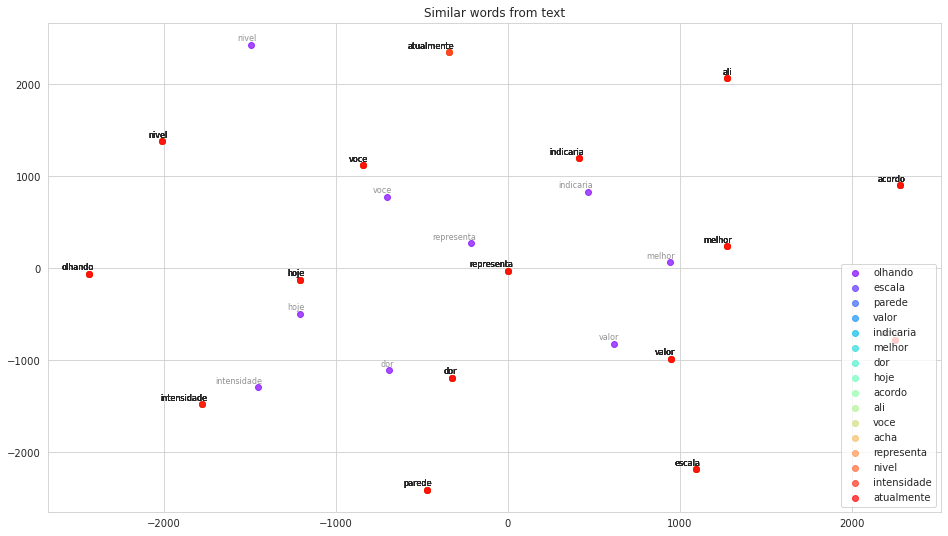

In [20]:
DataVisualizer.tsne_plot_similar_words(title_of_plot_first, matrix_words, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

### Mapa de palavras e seu grau de relacionamento

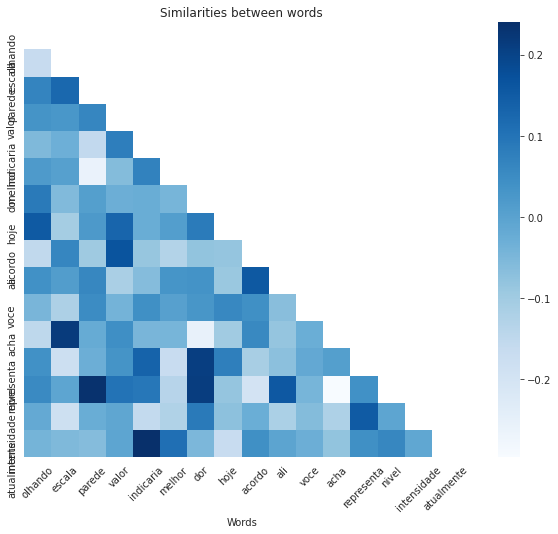

In [21]:
DataVisualizer.plo_similar_between_words(dataframe_matrix)

### Mapa dimensional de palavras similares

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd5fc0b3ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/opt/conda/lib/python3.8/site-packages/med/room/processors/data_views.py:100: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplo

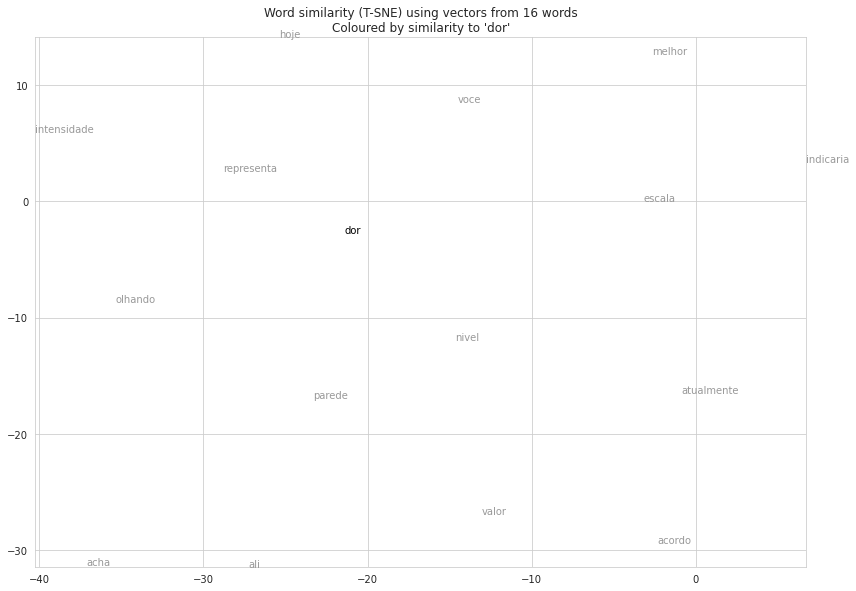

In [22]:
DataVisualizer.dimensional_vector_words(model, matrix_words, especifc_word_similar)